## Effectivenes script 

In this notebook, we will explore each step in the script [Effectiveness.R](https://github.com/correiajoao/data-analysis/blob/master/Effectiveness.R). The script explores a dataset containing software metrics and developer's perception about the presence of code smells in that code or not.

### Importing pacakges

The first lines in code imports the required for execution.


In [1]:

library(RWeka)
library(e1071)
library(gmodels)
library(caret)
library(irr)
library(randomForest)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘caret’

The following objects are masked _by_ ‘.GlobalEnv’:

    precision, recall

Loading required package: lpSolve
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



## Defining functions 
### Functions to calculate model's metrics

Using the results provided by the confusing matrix: true positives, true negatives, false positives, and false negatives; the following functions calculate individual metrics from the model's performance. The metrics are precision, recall, and f-Measure.



In [2]:

# Precision
precision <- function(tp, fp){
  precision <- tp/(tp+fp)
  return(precision)
}

# Recall
recall <- function(tp, fn){
  recall <- tp/(tp+fn)
  return(recall)
}

# F-measure
f_measure <- function(tp, fp, fn){
  f_measure <- (2*precision(tp,fp)*recall(tp,fn))/(recall(tp,fn) + precision(tp, fp))
  return(f_measure)
}


### Functions to compute confusing matrix 

Given the prediction performed by the model and the test set, the function below computes the confusing matrix and returns in array format the model's precision, recall, and f-measure.


In [3]:

measures <- function(test, pred){
  
  true_positive <- 0
  true_negative <- 0
  false_positive <- 0
  false_negative <- 0
  
  for(i in 1:length(pred)){
    if(test[i] == TRUE && pred[i] == TRUE){
      true_positive <- true_positive + 1
    }else if(test[i] == FALSE && pred[i] == FALSE){
      true_negative <- true_negative + 1
    }else if(test[i] == FALSE && pred[i] == TRUE){
      false_negative <- false_negative + 1
    }else if(test[i] == TRUE && pred[i] == FALSE){
      false_positive <- false_positive + 1
    }
  }
  
  measures <- c(precision(true_positive,false_positive), 
                recall(true_positive,false_negative), 
                f_measure(true_positive,false_positive,false_negative))
  
  return(measures)
}


### Functions to perform the machine learning algorithms

The following functions, receive as arguments the dataset and the number of folders. Each function splits the dataset in train and test. The function builds a model using the training subset, then predicts the instances from the test subset. After that, pass the prediction and the test subset for the function that computes the confusion matrix and the model's metrics, returning those metrics.

The algorithms are:
  - J48
  - Naive Bayes
  - C50
  - SVM
  - One R
  - JRip
  - Random Forest
  - SMO


In [4]:
executeJ48 <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- J48(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
}

executeNaiveBayes <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- naiveBayes(train, train$Smell, laplace = 1)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
  
}

executeC50 <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- C5.0(train, train$Smell)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
  
}

executeSVM <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- svm(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
  
}

executeOneR <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- OneR(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
  
}

executeJRip <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- JRip(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
  
}

executeRandomForest <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- randomForest(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
}

executeSMO <- function(dataset, folds){
  results <- lapply(folds, function(x) {
    train <- dataset[-x, ]
    test <- dataset[x, ]
    model <- SMO(train$Smell~ ., data = train)
    pred <- predict(model, test)
    
    results <- measures(test$Smell, pred)
    
    return(results)
  })
}

## Execution

### Creating data frames

In the execution, the first step is to define arrays and data frames containing algorithms, developers, and smells.

In [5]:
techniques <- c("J48", "NaiveBayes", "SVM", "oneR", "JRip", "RandomForest", "SMO")
smells <- c("FE", "DCL", "GC", "II","LM", "MC", "MM", "PO","RB","SG")

developers <- data.frame(c(1, 5, 6, 9, 55, 58, 60, 84, 97, 99, 101, 103),
                         c(2, 17, 18, 19, 21, 22, 27, 30, 77, 86, 93, 104),
                         c(1, 9, 13, 15, 16, 61, 62, 66, 84, 94, 102, 103),
                         c(2, 7, 21, 22, 24, 25, 28, 86, 104, 110, 111, 124),
                         c(41, 42, 43, 45, 46, 47, 49, 51, 64, 74, 81, 95),
                         c(5, 6, 10, 52, 53, 55, 58, 60, 91, 97, 99, 101),
                         c(8, 11, 39, 40, 41, 42, 43, 45, 46, 47, 74, 81),
                         c(46, 47, 49, 51, 52, 53, 64, 74, 91, 95, 105, 109),
                         c(13, 15, 16, 17, 18, 19, 30, 61, 94, 102, 111, 112),
                         c(5, 49, 51, 52, 53, 55, 56, 64, 91, 95, 99, 105))

colnames(developers) <- smells
list_of_results <- list()

### Training models 

The code below iterates over each developer and smells, performing the train, and calculating metrics for each generated model. Each developer (total 10) has an opinion about one code smell (total 12). For each pair (developer, smell), all the seven machine learning algorithm is performed, and the metrics were stored. 


In [6]:
    
for(j in 1:10){
  
  print(colnames(developers)[j])
  
  path <- paste("/Users/joaocorreia/data-analysis/Developers/",colnames(developers)[j],"/",colnames(developers)[j]," - ",sep="")
  
  results <- data.frame(0,0,0, 0, 0,0,0)
  
  
  for(q in 1:12){
    
    dev_path <- paste(path,developers[q,j],".csv",sep="")  
    dataset <- read.csv(dev_path, stringsAsFactors = FALSE)
    
    dataset$Smell <- factor(dataset$Smell)
    
    set.seed(3)
    folds <- createFolds(dataset$Smell, k =5)
    
    resultsJ48 <- executeJ48(dataset, folds)
    partial_results <- rowMeans(as.data.frame(resultsJ48), na.rm = TRUE)
    
    resultsNaiveBayes <- executeNaiveBayes(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsNaiveBayes), na.rm = TRUE) ) 
    
    resultsSVM <- executeSVM(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsSVM), na.rm = TRUE)) 
    
    resultsOneR <- executeOneR(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsOneR), na.rm = TRUE)) 
    
    resultsJRip <- executeJRip(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsJRip), na.rm = TRUE)) 
    
    resultsRandomForest <- executeRandomForest(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsRandomForest), na.rm = TRUE)) 
    
    resultsSMO <- executeSMO(dataset, folds)
    partial_results <- rbind(partial_results, rowMeans(as.data.frame(resultsSMO), na.rm = TRUE)) 
    
    rownames(partial_results) <- c("J48", "NaiveBayes", "SVM", "oneR", "JRip", "RandomForest","SMO")
    colnames(partial_results) <- c("Precision", "Recall", "F-measure")
    
    print(paste("Developer",developers[ q, j]))
    
    print(partial_results)
    
    results <- rbind(results, partial_results[,3])
  
  }
  
  results <- results[-1,]
  rownames(results) <- developers[ ,j]
  colnames(results) <- techniques
  results[,] <- lapply(results,function(x){ x[is.nan(x)]<-0;return(x)})
  
  list_of_results[[j]] <- results
  
}
    

[1] "FE"


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 1"
             Precision    Recall F-measure
J48                0.5 0.5000000 0.6000000
NaiveBayes         0.8 0.7916667 0.8666667
SVM                0.8 0.5416667 0.6916667
oneR               0.8 0.5416667 0.6916667
JRip               0.7 0.4583333 0.5833333
RandomForest       0.4 0.5416667 0.6555556
SMO                0.9 0.7000000 0.7266667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 5"
             Precision    Recall F-measure
J48                0.4 0.3333333 0.6666667
NaiveBayes         0.4 0.2500000 0.6666667
SVM                0.2 0.2500000 0.6666667
oneR               0.2 0.1250000 0.6666667
JRip               0.2 0.5000000 1.0000000
RandomForest       0.4 0.6250000 0.6666667
SMO                0.5 0.4583333 0.6888889


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 6"
             Precision    Recall F-measure
J48          0.6666667 0.8333333 0.6933333
NaiveBayes   0.3666667 0.4166667 0.5666667
SVM          1.0000000 0.7500000 0.8514286
oneR         0.5666667 0.7083333 0.6500000
JRip         0.9000000 0.8166667 0.8247619
RandomForest 0.7666667 0.7666667 0.7200000
SMO          0.8666667 0.8000000 0.7800000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 9"
             Precision    Recall F-measure
J48                0.2 0.1250000 0.6666667
NaiveBayes         0.4 0.2500000 0.6666667
SVM                0.2 0.1666667 0.6666667
oneR               0.0 0.0000000       NaN
JRip               0.0 0.0000000       NaN
RandomForest       0.4 0.2666667 0.7500000
SMO                0.7 0.3333333 0.5583333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 55"
             Precision    Recall F-measure
J48                0.5 0.4166667 0.6555556
NaiveBayes         0.4 0.4333333 0.6555556
SVM                1.0 0.6000000 0.7466667
oneR               0.8 0.5333333 0.6266667
JRip               1.0 0.6000000 0.7466667
RandomForest       0.3 0.2500000 0.6000000
SMO                0.5 0.3750000 0.6111111


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 58"
             Precision    Recall F-measure
J48                0.1 0.1666667 0.5000000
NaiveBayes         0.4 0.3750000 0.5555556
SVM                0.9 0.5000000 0.6266667
oneR               0.8 0.5416667 0.7000000
JRip               0.3 0.3333333 0.4500000
RandomForest       0.6 0.5333333 0.6583333
SMO                0.4 0.2916667 0.7333333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 60"
             Precision    Recall F-measure
J48                0.3 0.3750000 0.7500000
NaiveBayes         0.1 0.1111111 0.4000000
SVM                0.0 0.0000000       NaN
oneR               0.5 0.5000000 0.6111111
JRip               0.4 0.3750000 0.8333333
RandomForest       0.5 0.6250000 0.8333333
SMO                0.1 0.1666667 0.4000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 84"
             Precision     Recall F-measure
J48                0.0 0.00000000       NaN
NaiveBayes         0.5 0.29166667 0.5000000
SVM                0.0        NaN       NaN
oneR               0.2 0.33333333 1.0000000
JRip               0.0 0.00000000       NaN
RandomForest       0.2 0.12500000 0.6666667
SMO                0.2 0.08333333 0.5000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 97"
             Precision    Recall F-measure
J48                0.8 0.5333333      0.80
NaiveBayes         0.8 0.7333333      0.76
SVM                1.0 0.6666667      0.80
oneR               1.0 0.6666667      0.80
JRip               1.0 0.6666667      0.80
RandomForest       0.8 0.6000000      0.68
SMO                0.9 0.7000000      0.78


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 99"
             Precision    Recall F-measure
J48                0.0 0.0000000       NaN
NaiveBayes         0.9 0.5333333 0.6333333
SVM                0.0 0.0000000       NaN
oneR               0.3 0.6666667 0.8333333
JRip               0.0 0.0000000       NaN
RandomForest       0.3 0.4000000 0.8333333
SMO                0.4 0.2777778 0.5833333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 101"
             Precision    Recall F-measure
J48                0.2 0.2500000 1.0000000
NaiveBayes         0.5 0.5000000 0.6666667
SVM                0.2 0.5000000 0.6666667
oneR               0.4 0.5000000 1.0000000
JRip               0.1 0.5000000 0.6666667
RandomForest       0.3 0.6666667 0.8333333
SMO                0.0 0.0000000       NaN


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘Essential’ constant. Cannot scale data.”

[1] "Developer 103"
             Precision    Recall F-measure
J48                0.5 0.7222222 0.7111111
NaiveBayes         0.8 0.8333333 0.7600000
SVM                0.8 0.7000000 0.6600000
oneR               0.5 0.5000000 0.6555556
JRip               0.8 0.6666667 0.7750000
RandomForest       0.7 0.6666667 0.7416667
SMO                1.0 0.7333333 0.8266667
[1] "DCL"


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 2"
             Precision    Recall F-measure
J48                0.7 0.7333333 0.6600000
NaiveBayes         0.6 0.9166667 0.7833333
SVM                1.0 0.6000000 0.7466667
oneR               0.8 0.9000000 0.8333333
JRip               0.9 0.7333333 0.7600000
RandomForest       0.9 0.9000000 0.8666667
SMO                0.9 0.9333333 0.8933333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘AvgEssential’ and ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ and ‘MaxEssential’ constant. Cannot scale data.”

[1] "Developer 17"
             Precision    Recall F-measure
J48                0.7 0.7916667 0.7833333
NaiveBayes         0.8 0.8333333 0.7600000
SVM                1.0 0.6000000 0.7466667
oneR               0.8 0.7333333 0.7266667
JRip               0.7 0.5666667 0.7333333
RandomForest       0.9 0.8333333 0.8266667
SMO                0.8 0.7000000 0.7000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 18"
             Precision    Recall F-measure
J48                0.9 1.0000000 0.9333333
NaiveBayes         0.9 0.9333333 0.8933333
SVM                1.0 0.7500000 0.8514286
oneR               0.9 0.8833333 0.8647619
JRip               0.8 0.8166667 0.7580952
RandomForest       1.0 0.8833333 0.9314286
SMO                1.0 0.8166667 0.8914286


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 19"
             Precision    Recall F-measure
J48                0.8 0.9166667 0.9500000
NaiveBayes         0.9 1.0000000 0.9333333
SVM                0.0       NaN       NaN
oneR               0.6 0.8333333 0.8888889
JRip               0.6 0.6666667 0.9333333
RandomForest       1.0 0.9333333 0.9600000
SMO                1.0 0.8333333 0.8933333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 21"
             Precision    Recall F-measure
J48                0.9 1.0000000 0.9333333
NaiveBayes         0.7 1.0000000 0.9166667
SVM                1.0 0.6000000 0.7466667
oneR               0.9 0.8666667 0.8533333
JRip               1.0 0.7666667 0.8533333
RandomForest       1.0 1.0000000 1.0000000
SMO                1.0 1.0000000 1.0000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 22"
             Precision    Recall F-measure
J48                0.8 0.8666667 0.7866667
NaiveBayes         0.3 0.5000000 0.6111111
SVM                1.0 0.6000000 0.7466667
oneR               0.8 0.5333333 0.6266667
JRip               0.9 0.8666667 0.8533333
RandomForest       0.7 0.4666667 0.6916667
SMO                0.5 0.5416667 0.7666667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 27"
             Precision    Recall F-measure
J48                0.6 1.0000000 1.0000000
NaiveBayes         1.0 0.8666667 0.9000000
SVM                0.0       NaN       NaN
oneR               0.0 0.0000000       NaN
JRip               0.6 0.5555556 0.6666667
RandomForest       0.8 0.8333333 0.8750000
SMO                0.8 0.7083333 0.7916667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 30"
             Precision    Recall F-measure
J48                0.4 0.3333333 0.6666667
NaiveBayes         1.0 0.8000000 0.8666667
SVM                0.0       NaN       NaN
oneR               0.2 0.2500000 0.6666667
JRip               0.6 0.5000000 0.7777778
RandomForest       1.0 0.8000000 0.8666667
SMO                1.0 0.8000000 0.8666667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 77"
             Precision    Recall F-measure
J48          0.9000000 0.8166667 0.8247619
NaiveBayes   0.4666667 0.7500000 0.6416667
SVM          1.0000000 0.8166667 0.8914286
oneR         0.9333333 0.8000000 0.8533333
JRip         1.0000000 0.8166667 0.8914286
RandomForest 0.9000000 0.8166667 0.8247619
SMO          0.8666667 0.8000000 0.8133333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 86"
             Precision    Recall F-measure
J48                0.9 1.0000000 0.9333333
NaiveBayes         0.7 1.0000000 0.9166667
SVM                1.0 0.6000000 0.7466667
oneR               0.9 0.8666667 0.8533333
JRip               1.0 0.7666667 0.8533333
RandomForest       1.0 1.0000000 1.0000000
SMO                1.0 1.0000000 1.0000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 93"
             Precision    Recall F-measure
J48                0.8 0.8000000 0.7666667
NaiveBayes         0.8 0.9000000 0.8000000
SVM                0.6 0.4444444 0.6111111
oneR               0.9 0.8000000 0.8000000
JRip               0.9 0.9000000 0.8666667
RandomForest       0.9 0.8333333 0.8266667
SMO                0.9 0.8333333 0.8266667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassBase’ and ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 104"
             Precision    Recall F-measure
J48                0.9 1.0000000 0.9333333
NaiveBayes         0.7 1.0000000 0.9166667
SVM                1.0 0.6000000 0.7466667
oneR               0.9 0.8666667 0.8533333
JRip               1.0 0.7666667 0.8533333
RandomForest       1.0 1.0000000 1.0000000
SMO                1.0 1.0000000 1.0000000
[1] "GC"


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 1"
             Precision    Recall F-measure
J48               1.00 0.8750000 0.9166667
NaiveBayes        1.00 0.7000000 0.9166667
SVM               0.25 0.5000000 0.6666667
oneR              0.50 0.6666667 1.0000000
JRip              0.25 0.5000000 1.0000000
RandomForest      0.50 0.6666667 1.0000000
SMO               0.75 0.6250000 0.8888889


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 9"
             Precision    Recall F-measure
J48                0.4 0.3333333 0.6666667
NaiveBayes         1.0 0.9000000 0.9333333
SVM                0.6 0.8333333 0.8888889
oneR               1.0 1.0000000 1.0000000
JRip               1.0 1.0000000 1.0000000
RandomForest       1.0 0.9000000 0.9333333
SMO                0.8 0.8750000 0.9166667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 13"
             Precision    Recall F-measure
J48                0.8 0.7500000 0.8333333
NaiveBayes         0.6 0.7777778 0.8333333
SVM                0.0       NaN       NaN
oneR               0.6 0.7777778 0.8333333
JRip               0.4 0.6666667 0.7500000
RandomForest       0.6 0.7777778 0.8333333
SMO                0.2 0.2500000 1.0000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 15"
             Precision    Recall F-measure
J48                0.4 0.3333333 0.7500000
NaiveBayes         0.2 0.1250000 0.6666667
SVM                0.0       NaN       NaN
oneR               0.0 0.0000000       NaN
JRip               0.0 0.0000000       NaN
RandomForest       0.2 0.5000000 1.0000000
SMO                0.6 0.6000000 1.0000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 16"
             Precision    Recall F-measure
J48                0.4 0.3333333 0.6666667
NaiveBayes         1.0 0.9000000 0.9333333
SVM                0.6 0.8333333 0.8888889
oneR               1.0 1.0000000 1.0000000
JRip               1.0 1.0000000 1.0000000
RandomForest       1.0 0.9000000 0.9333333
SMO                0.8 0.8750000 0.9166667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 61"
             Precision Recall F-measure
J48               0.25   0.25 1.0000000
NaiveBayes        0.00   0.00       NaN
SVM               0.00    NaN       NaN
oneR              0.50   0.25 0.6666667
JRip              0.00   0.00       NaN
RandomForest      0.00   0.00       NaN
SMO               0.00   0.00       NaN


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 62"
             Precision    Recall F-measure
J48                0.6 0.3750000 0.6555556
NaiveBayes         0.5 0.5000000 0.7777778
SVM                0.0       NaN       NaN
oneR               0.3 0.5000000 0.6666667
JRip               0.0       NaN       NaN
RandomForest       0.1 0.3333333 0.6666667
SMO                0.5 0.6111111 0.6666667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 66"
             Precision    Recall F-measure
J48          0.3333333 0.3333333 1.0000000
NaiveBayes   0.6666667 0.5000000 0.8333333
SVM          0.0000000       NaN       NaN
oneR         0.3333333 0.5000000 1.0000000
JRip         0.3333333 0.5000000 1.0000000
RandomForest 0.6666667 0.6666667 1.0000000
SMO          0.6666667 0.5000000 0.8333333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 84"
             Precision    Recall F-measure
J48                0.6 0.5000000 0.7777778
NaiveBayes         0.4 0.5000000 0.8333333
SVM                0.0       NaN       NaN
oneR               0.2 0.1666667 0.6666667
JRip               0.0       NaN       NaN
RandomForest       0.4 0.5000000 0.8333333
SMO                0.4 0.6666667 1.0000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 94"
             Precision    Recall F-measure
J48                0.8 0.7916667 0.8666667
NaiveBayes         0.8 0.8750000 0.9166667
SVM                0.6 1.0000000 1.0000000
oneR               0.8 0.7916667 0.8666667
JRip               0.8 0.7916667 0.8666667
RandomForest       0.8 0.8750000 0.9166667
SMO                0.8 1.0000000 1.0000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 102"
             Precision     Recall F-measure
J48                0.6 0.61111111 0.7222222
NaiveBayes         0.4 0.44444444 0.7500000
SVM                0.0        NaN       NaN
oneR               0.2 0.08333333 0.5000000
JRip               0.0        NaN       NaN
RandomForest       0.0 0.00000000       NaN
SMO                0.4 0.66666667 0.7500000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 103"
             Precision    Recall F-measure
J48                0.8 1.0000000 0.8666667
NaiveBayes         0.9 0.9000000 0.8666667
SVM                0.8 1.0000000 1.0000000
oneR               0.7 0.8750000 0.8750000
JRip               0.5 0.8333333 0.8333333
RandomForest       0.9 1.0000000 0.9333333
SMO                0.7 1.0000000 0.9166667
[1] "II"
[1] "Developer 2"
             Precision    Recall F-measure
J48                0.5 0.3333333 0.6555556
NaiveBayes         0.5 0.4666667 0.5416667
SVM                0.8 0.6666667 0.6666667
oneR               0.9 0.6333333 0.7266667
JRip               0.4 0.2777778 0.5833333
RandomForest       0.6 0.4000000 0.5750000
SMO                0.5 0.3000000 0.6000000
[1] "Developer 7"
             Precision    Recall F-measure
J48                0.4 0.3333333 0.6500000
NaiveBayes         0.8 0.6666667 0.7833333
SVM                0.0 0.0000000       NaN
oneR               0.4 0.5833333 0.6111111
JRip               0.2 0.1666667

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassDerived’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 8"
             Precision    Recall F-measure
J48               0.50 0.5000000 0.8333333
NaiveBayes        0.50 0.2500000 0.6666667
SVM               0.25 1.0000000 1.0000000
oneR              0.50 0.5000000 0.8333333
JRip              0.00 0.0000000       NaN
RandomForest      0.50 0.6666667 1.0000000
SMO               0.50 0.5000000 0.6666667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 11"
             Precision    Recall F-measure
J48                0.2 0.1666667 0.6666667
NaiveBayes         0.1 0.1666667 0.5000000
SVM                0.0       NaN       NaN
oneR               0.3 0.3333333 0.5833333
JRip               0.0 0.0000000       NaN
RandomForest       0.0 0.0000000       NaN
SMO                0.2 0.1666667 0.6666667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodProtected’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 39"
             Precision    Recall F-measure
J48               0.75 0.5833333 0.8333333
NaiveBayes        0.75 0.4000000 0.7777778
SVM               0.25 1.0000000 1.0000000
oneR              0.00 0.0000000       NaN
JRip              0.50 0.6666667 1.0000000
RandomForest      0.50 0.6666667 1.0000000
SMO               0.50 0.7500000 0.8333333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 40"
             Precision    Recall F-measure
J48                0.6 0.7916667 0.7000000
NaiveBayes         0.8 0.9166667 0.9500000
SVM                1.0 0.8000000 0.8600000
oneR               0.8 0.7083333 0.8166667
JRip               0.6 0.4166667 0.7000000
RandomForest       0.8 0.7916667 0.8666667
SMO                1.0 0.8000000 0.8600000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 41"
             Precision    Recall F-measure
J48                0.4 0.5000000 0.8333333
NaiveBayes         1.0 0.6000000 0.7266667
SVM                0.0 0.0000000       NaN
oneR               0.4 0.5000000 0.6666667
JRip               0.2 0.1666667 0.5000000
RandomForest       0.9 0.6666667 0.7000000
SMO                0.7 0.4583333 0.5833333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountClassDerived’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 42"
             Precision    Recall F-measure
J48                0.4 0.5000000 0.8333333
NaiveBayes         0.8 0.5000000 0.7500000
SVM                0.4 0.7500000 0.8333333
oneR               0.0 0.0000000       NaN
JRip               0.2 0.5000000 0.6666667
RandomForest       0.4 0.7500000 0.8333333
SMO                0.6 0.4583333 0.7222222


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 43"
             Precision Recall F-measure
J48                  0      0       NaN
NaiveBayes           0      0       NaN
SVM                  0    NaN       NaN
oneR                 0      0       NaN
JRip                 0    NaN       NaN
RandomForest         0    NaN       NaN
SMO                  0      0       NaN


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 45"
             Precision    Recall F-measure
J48                0.6 0.5000000 0.7777778
NaiveBayes         0.8 0.6250000 0.7500000
SVM                0.0       NaN       NaN
oneR               0.0 0.0000000       NaN
JRip               0.2 0.2500000 0.6666667
RandomForest       0.8 0.6250000 0.7500000
SMO                0.4 0.3333333 0.6666667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 46"
             Precision    Recall F-measure
J48                0.1 0.1666667 0.5000000
NaiveBayes         0.6 0.6666667 0.7777778
SVM                0.0 0.0000000       NaN
oneR               0.1 0.2500000 0.5000000
JRip               0.5 0.5000000 0.6111111
RandomForest       0.0 0.0000000       NaN
SMO                0.3 0.3750000 0.7500000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 47"
             Precision    Recall F-measure
J48                0.3 0.5000000 0.6666667
NaiveBayes         0.8 0.5333333 0.7833333
SVM                0.0 0.0000000       NaN
oneR               0.0 0.0000000       NaN
JRip               0.2 0.2500000 0.6666667
RandomForest       0.5 0.3666667 0.6111111
SMO                0.3 0.3000000 0.7500000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 74"
             Precision    Recall F-measure
J48                0.2 0.1250000 0.6666667
NaiveBayes         0.8 0.4333333 0.6666667
SVM                0.0 0.0000000       NaN
oneR               0.0 0.0000000       NaN
JRip               0.2 0.1666667 0.6666667
RandomForest       0.2 0.3333333 1.0000000
SMO                0.2 0.2000000 1.0000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ constant. Cannot scale data.”

[1] "Developer 81"
             Precision    Recall F-measure
J48                0.8 0.7083333 0.7916667
NaiveBayes         0.6 0.3333333 0.5000000
SVM                0.0 0.0000000       NaN
oneR               0.8 0.8750000 0.9166667
JRip               0.2 0.3333333 0.5000000
RandomForest       0.2 0.5000000 0.6666667
SMO                0.2 0.3333333 1.0000000
[1] "PO"
[1] "Developer 46"
             Precision    Recall F-measure
J48          0.7666667 1.0000000 0.8333333
NaiveBayes   0.8666667 0.9333333 0.8800000
SVM          1.0000000 0.8166667 0.8914286
oneR         0.8666667 0.9333333 0.8600000
JRip         0.8666667 0.8666667 0.8200000
RandomForest 0.9333333 0.8666667 0.8933333
SMO          0.9333333 0.8666667 0.8933333
[1] "Developer 47"
             Precision    Recall F-measure
J48                0.6 0.7333333 0.6266667
NaiveBayes         0.5 0.7333333 0.7000000
SVM                0.9 0.6333333 0.7400000
oneR               0.7 0.6333333 0.6600000
JRip               0.9 0.633333

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclClassMethod’ and ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 13"
             Precision    Recall F-measure
J48                0.4 0.2083333 0.5833333
NaiveBayes         0.2 0.3333333 1.0000000
SVM                0.0       NaN       NaN
oneR               0.0 0.0000000       NaN
JRip               0.0       NaN       NaN
RandomForest       0.2 0.1666667 0.6666667
SMO                0.2 0.1111111 0.5000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 15"
             Precision    Recall F-measure
J48                0.8 0.5666667 0.8166667
NaiveBayes         0.8 0.5000000 0.5933333
SVM                0.7 0.4583333 0.5833333
oneR               0.6 0.2666667 0.6111111
JRip               0.6 0.3750000 0.6555556
RandomForest       0.6 0.6250000 0.6166667
SMO                0.4 0.4666667 0.6111111


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 16"
             Precision    Recall F-measure
J48                0.6 0.6000000 0.5666667
NaiveBayes         0.3 0.4444444 0.4666667
SVM                0.9 0.5666667 0.6866667
oneR               0.7 0.6000000 0.6000000
JRip               1.0 0.6000000 0.7466667
RandomForest       0.6 0.5000000 0.5833333
SMO                0.5 0.4583333 0.5166667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 17"
             Precision    Recall F-measure
J48          1.0000000 0.6666667 0.7777778
NaiveBayes   0.0000000       NaN       NaN
SVM          0.0000000       NaN       NaN
oneR         0.6666667 0.7500000 0.8333333
JRip         0.3333333 0.5000000 0.6666667
RandomForest 0.6666667 1.0000000 1.0000000
SMO          0.3333333 0.2500000 0.6666667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 18"
             Precision    Recall F-measure
J48                0.8 0.8750000 0.9166667
NaiveBayes         0.7 0.8333333 0.8500000
SVM                1.0 0.8333333 0.8933333
oneR               0.8 0.8750000 0.9166667
JRip               0.8 0.8000000 0.7666667
RandomForest       0.8 0.8750000 0.9166667
SMO                0.8 0.9166667 0.9500000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 19"
             Precision    Recall F-measure
J48                0.9 0.8666667 0.8533333
NaiveBayes         1.0 0.6666667 0.7866667
SVM                0.9 0.7333333 0.7600000
oneR               1.0 0.8666667 0.9200000
JRip               0.8 0.7000000 0.7066667
RandomForest       0.8 0.8333333 0.7933333
SMO                0.7 0.6666667 0.7416667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 30"
             Precision    Recall F-measure
J48                0.7 0.7500000 0.7916667
NaiveBayes         0.7 0.7500000 0.7500000
SVM                0.9 0.5000000 0.6266667
oneR               0.9 0.8333333 0.8266667
JRip               0.7 0.6250000 0.6666667
RandomForest       0.7 0.7916667 0.7833333
SMO                1.0 0.7333333 0.8266667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 61"
             Precision    Recall F-measure
J48                0.3 0.2500000 0.5833333
NaiveBayes         0.2 0.1250000 0.6666667
SVM                0.2 0.5000000 0.6666667
oneR               0.2 0.1250000 0.6666667
JRip               0.0 0.0000000       NaN
RandomForest       0.2 0.1666667 0.6666667
SMO                0.2 0.1666667 0.6666667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 94"
             Precision    Recall F-measure
J48                0.7 0.7083333 0.7083333
NaiveBayes         0.4 0.2916667 0.7333333
SVM                0.8 0.5000000 0.6583333
oneR               0.8 0.6000000 0.6266667
JRip               0.6 0.4444444 0.6111111
RandomForest       0.6 0.7083333 0.6250000
SMO                0.9 0.9333333 0.8933333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 102"
             Precision    Recall F-measure
J48                0.6 0.4666667 0.6416667
NaiveBayes         0.8 0.7666667 0.7333333
SVM                0.3 0.4166667 0.5000000
oneR               0.7 0.7000000 0.8750000
JRip               0.3 0.5000000 0.7500000
RandomForest       0.8 0.7666667 0.7333333
SMO                0.9 0.7000000 0.7266667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 111"
             Precision    Recall F-measure
J48          0.8333333 0.8666667 0.8266667
NaiveBayes   0.6666667 0.6333333 0.8000000
SVM          1.0000000 0.7500000 0.8514286
oneR         0.7000000 0.7333333 0.8666667
JRip         0.8000000 0.6000000 0.8500000
RandomForest 0.9333333 0.8000000 0.8533333
SMO          0.8666667 0.9333333 0.8600000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘BCountDeclMethodPrivate’ constant. Cannot scale data.”

[1] "Developer 112"
             Precision    Recall F-measure
J48               0.50 0.5000000 0.8333333
NaiveBayes        0.25 0.1666667 0.6666667
SVM               0.00       NaN       NaN
oneR              0.25 0.1666667 0.5000000
JRip              0.25 0.5000000 0.6666667
RandomForest      0.25 0.5000000 1.0000000
SMO               0.00 0.0000000       NaN
[1] "SG"


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 5"
             Precision    Recall F-measure
J48                0.4 0.1666667 0.5833333
NaiveBayes         0.6 0.4583333 0.7222222
SVM                0.4 1.0000000 1.0000000
oneR               0.2 0.1666667 0.5000000
JRip               0.2 0.3333333 0.5000000
RandomForest       0.4 0.2777778 0.5833333
SMO                0.4 0.3333333 0.7500000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ and ‘CountDeclMethodPrivate’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 49"
             Precision    Recall F-measure
J48                0.4 0.3750000 0.5555556
NaiveBayes         0.6 0.6666667 0.7777778
SVM                0.2 0.1666667 0.5000000
oneR               0.1 0.5000000 0.5000000
JRip               0.4 0.5000000 0.5555556
RandomForest       0.6 0.6250000 0.6250000
SMO                0.7 0.8750000 0.8333333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 51"
             Precision    Recall F-measure
J48                0.4 0.4444444 0.5000000
NaiveBayes         0.7 0.7083333 0.7333333
SVM                0.7 0.3666667 0.5833333
oneR               0.7 0.4333333 0.6500000
JRip               0.6 0.4444444 0.6111111
RandomForest       0.3 0.2916667 0.6500000
SMO                0.7 0.5416667 0.6500000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 52"
             Precision    Recall F-measure
J48                0.0 0.0000000       NaN
NaiveBayes         0.0 0.0000000       NaN
SVM                0.4 1.0000000      1.00
oneR               0.4 0.4000000      1.00
JRip               0.0 0.0000000       NaN
RandomForest       0.4 0.3333333      0.75
SMO                0.2 0.1111111      0.50


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 53"
             Precision     Recall F-measure
J48                1.0 0.76666667 0.8333333
NaiveBayes         0.8 0.36666667 0.6250000
SVM                0.0 0.00000000       NaN
oneR               0.2 0.08333333 0.5000000
JRip               0.0 0.00000000       NaN
RandomForest       0.6 0.62500000 0.8888889
SMO                0.4 0.50000000 1.0000000


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 55"
             Precision    Recall F-measure
J48                0.7 0.7916667 0.7833333
NaiveBayes         0.6 0.4583333 0.7555556
SVM                0.8 0.5333333 0.6266667
oneR               0.6 0.6333333 0.7416667
JRip               0.9 0.6333333 0.7266667
RandomForest       0.6 0.7333333 0.7833333
SMO                0.9 0.6666667 0.7533333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 56"
             Precision    Recall F-measure
J48                0.8 0.5833333 0.7083333
NaiveBayes         0.4 0.5000000 0.6666667
SVM                0.0       NaN       NaN
oneR               0.4 0.3333333 0.6666667
JRip               0.6 0.4444444 0.6111111
RandomForest       0.4 0.5000000 0.6666667
SMO                0.4 0.3333333 0.6666667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 64"
             Precision    Recall F-measure
J48          0.7000000 0.7833333 0.6980952
NaiveBayes   0.5333333 0.8750000 0.7416667
SVM          1.0000000 0.7500000 0.8514286
oneR         0.8000000 0.7166667 0.7247619
JRip         0.9000000 0.7166667 0.7914286
RandomForest 0.7000000 0.6833333 0.6647619
SMO          0.9000000 0.7166667 0.7914286


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 91"
             Precision    Recall F-measure
J48                0.5 0.5000000 0.6111111
NaiveBayes         0.6 0.6666667 0.8000000
SVM                0.7 0.5416667 0.6583333
oneR               0.6 0.6250000 0.6166667
JRip               0.5 0.4583333 0.6111111
RandomForest       0.3 0.4166667 0.7333333
SMO                0.5 0.6250000 0.5833333


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 95"
             Precision    Recall F-measure
J48               0.75 0.6250000 0.8888889
NaiveBayes        1.00 0.7500000 0.8333333
SVM               0.00       NaN       NaN
oneR              0.50 0.6666667 1.0000000
JRip              0.00 0.0000000       NaN
RandomForest      0.75 1.0000000 1.0000000
SMO               0.50 0.3333333 0.6666667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 99"
             Precision    Recall F-measure
J48                0.4 0.5000000 0.6111111
NaiveBayes         0.8 0.6000000 0.8333333
SVM                0.0 0.0000000       NaN
oneR               0.5 0.3750000 0.6111111
JRip               0.5 0.6666667 0.7222222
RandomForest       0.6 0.5000000 0.8888889
SMO                0.8 0.7666667 0.7466667


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclClassMethod’ and ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘CountDeclMethodDefault’ constant. Cannot scale data.”

[1] "Developer 105"
             Precision    Recall F-measure
J48                0.0       NaN       NaN
NaiveBayes         0.0 0.0000000       NaN
SVM                0.0       NaN       NaN
oneR               0.5 0.5000000 0.6666667
JRip               0.0       NaN       NaN
RandomForest       0.5 0.5000000 0.6666667
SMO                0.5 0.3333333 1.0000000


### Print partial results

After the training and evaluation were performed, the following print occurs. That print shows a matrix containing the precision obtained for each algorithm in predicts the developer brief about code smells presence in a piece of code.


In [7]:
print(list_of_results) 


[[1]]
          J48 NaiveBayes       SVM      oneR      JRip RandomForest       SMO
1   0.6000000  0.8666667 0.6916667 0.6916667 0.5833333    0.6555556 0.7266667
5   0.6666667  0.6666667 0.6666667 0.6666667 1.0000000    0.6666667 0.6888889
6   0.6933333  0.5666667 0.8514286 0.6500000 0.8247619    0.7200000 0.7800000
9   0.6666667  0.6666667 0.6666667 0.0000000 0.0000000    0.7500000 0.5583333
55  0.6555556  0.6555556 0.7466667 0.6266667 0.7466667    0.6000000 0.6111111
58  0.5000000  0.5555556 0.6266667 0.7000000 0.4500000    0.6583333 0.7333333
60  0.7500000  0.4000000 0.0000000 0.6111111 0.8333333    0.8333333 0.4000000
84  0.0000000  0.5000000 0.0000000 1.0000000 0.0000000    0.6666667 0.5000000
97  0.8000000  0.7600000 0.8000000 0.8000000 0.8000000    0.6800000 0.7800000
99  0.0000000  0.6333333 0.0000000 0.8333333 0.0000000    0.8333333 0.5833333
101 1.0000000  0.6666667 0.6666667 1.0000000 0.6666667    0.8333333 0.0000000
103 0.7111111  0.7600000 0.6600000 0.6555556 0.7750000    

The next line is just another way to show the same information obtained using the previous print.


In [8]:
for(smell in 1:10){
  print(smells[smell])
  print(list_of_results[[smell]])
}

[1] "FE"
          J48 NaiveBayes       SVM      oneR      JRip RandomForest       SMO
1   0.6000000  0.8666667 0.6916667 0.6916667 0.5833333    0.6555556 0.7266667
5   0.6666667  0.6666667 0.6666667 0.6666667 1.0000000    0.6666667 0.6888889
6   0.6933333  0.5666667 0.8514286 0.6500000 0.8247619    0.7200000 0.7800000
9   0.6666667  0.6666667 0.6666667 0.0000000 0.0000000    0.7500000 0.5583333
55  0.6555556  0.6555556 0.7466667 0.6266667 0.7466667    0.6000000 0.6111111
58  0.5000000  0.5555556 0.6266667 0.7000000 0.4500000    0.6583333 0.7333333
60  0.7500000  0.4000000 0.0000000 0.6111111 0.8333333    0.8333333 0.4000000
84  0.0000000  0.5000000 0.0000000 1.0000000 0.0000000    0.6666667 0.5000000
97  0.8000000  0.7600000 0.8000000 0.8000000 0.8000000    0.6800000 0.7800000
99  0.0000000  0.6333333 0.0000000 0.8333333 0.0000000    0.8333333 0.5833333
101 1.0000000  0.6666667 0.6666667 1.0000000 0.6666667    0.8333333 0.0000000
103 0.7111111  0.7600000 0.6600000 0.6555556 0.7750000 

### Mean of results

Although the code below seems to be complex, they just calculate the mean of the results obtained by the algorithms in the prediction of conde smells, considering all developers.

In [9]:
results_mean <-     matrix(c(mean(list_of_results[[1]]$J48), 
                             mean(list_of_results[[1]]$NaiveBayes), 
                             mean(list_of_results[[1]]$SVM), 
                             mean(list_of_results[[1]]$oneR), 
                             mean(list_of_results[[1]]$JRip), 
                             mean(list_of_results[[1]]$RandomForest), 
                             mean(list_of_results[[1]]$SMO)), 
                           nrow = 1,
                           ncol = 7)

for(smell in 2:10){
  results_mean <- rbind(results_mean, c(mean(list_of_results[[smell]]$J48), 
                                        mean(list_of_results[[smell]]$NaiveBayes), 
                                        mean(list_of_results[[smell]]$SVM), 
                                        mean(list_of_results[[smell]]$oneR), 
                                        mean(list_of_results[[smell]]$JRip), 
                                        mean(list_of_results[[smell]]$RandomForest), 
                                        mean(list_of_results[[smell]]$SMO)))
}

### Ploting graph 

Finaally, the lest block of code is used to set and print a chart relating code smells and the effectiveness of the machine learning algorithms to predict them using the developer's opinion. 

,FE,DCL,GC,II,LM,MC,MM,PO,RB,SG
J48,0.5869444,0.8476190,0.8101852,0.6430556,0.7805159,0.5990079,0.6752315,0.7158796,0.7416204,0.5644246
NaiveBayes,0.6414815,0.8282870,0.7717593,0.6334722,0.7726653,0.5606283,0.6540741,0.7332870,0.6705556,0.6240741
SVM,0.5313690,0.5694974,0.3703704,0.3773611,0.7607738,0.5188492,0.3077778,0.5869709,0.5188690,0.4349802
oneR,0.6862500,0.7350265,0.7562500,0.5938426,0.7264418,0.5927579,0.3597222,0.6642593,0.6868981,0.6814616
JRip,0.5566468,0.8167196,0.5375000,0.5893981,0.7369974,0.5588294,0.4981481,0.4638889,0.5905556,0.4274339
RandomForest,0.7199074,0.8891270,0.7541667,0.6305556,0.8168783,0.5503307,0.6189815,0.6017593,0.7698611,0.7417394
SMO,0.5990278,0.8702579,0.8240741,0.6731944,0.6613757,0.5142196,0.7082407,0.7734722,0.6632870,0.7451190


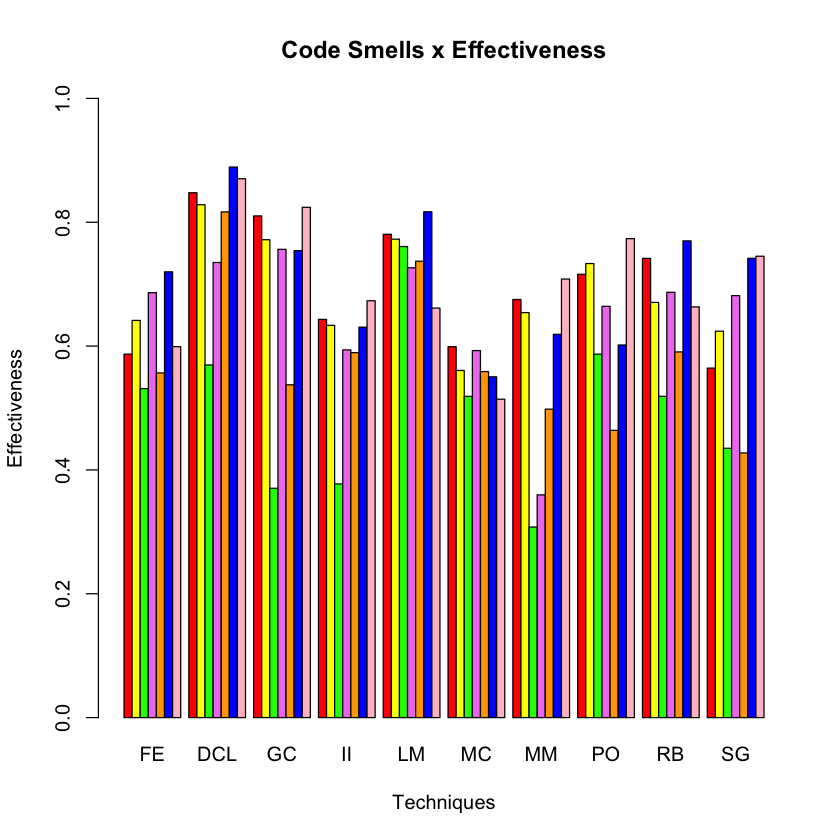

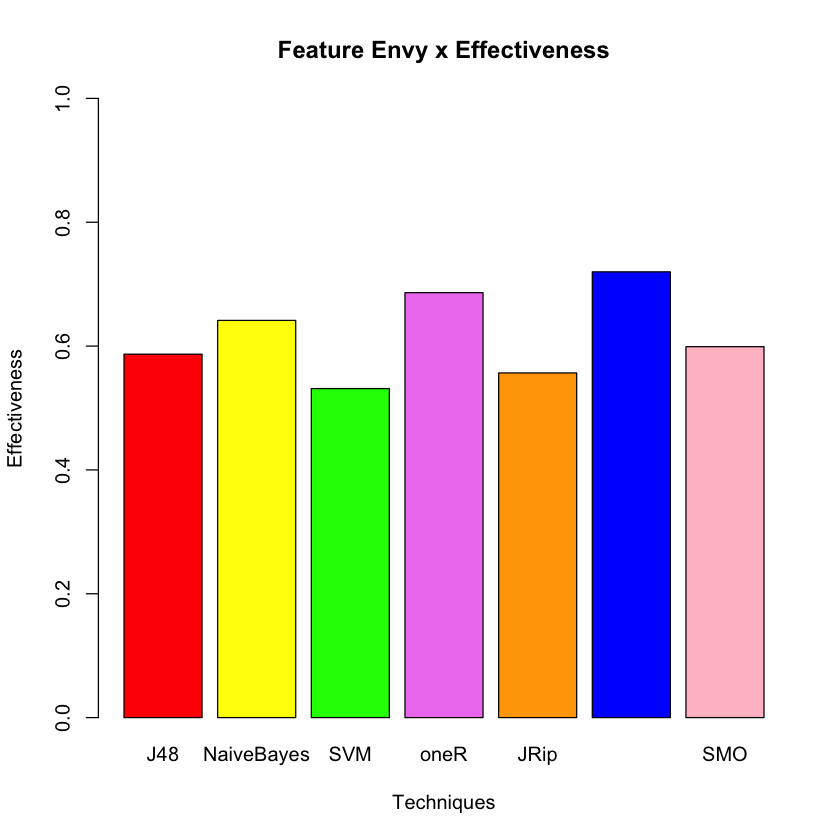

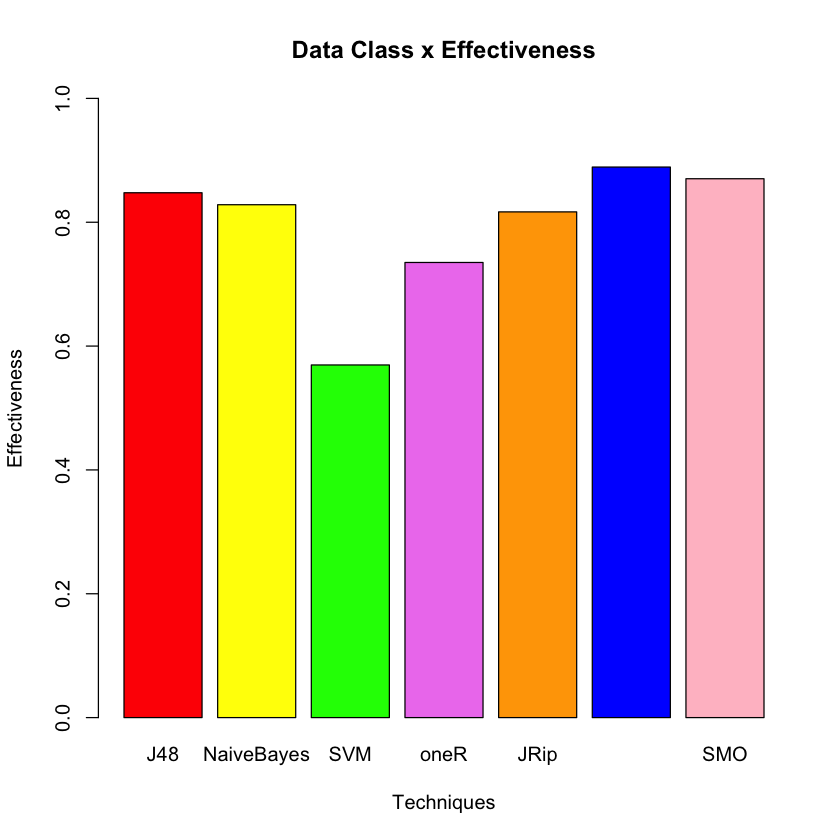

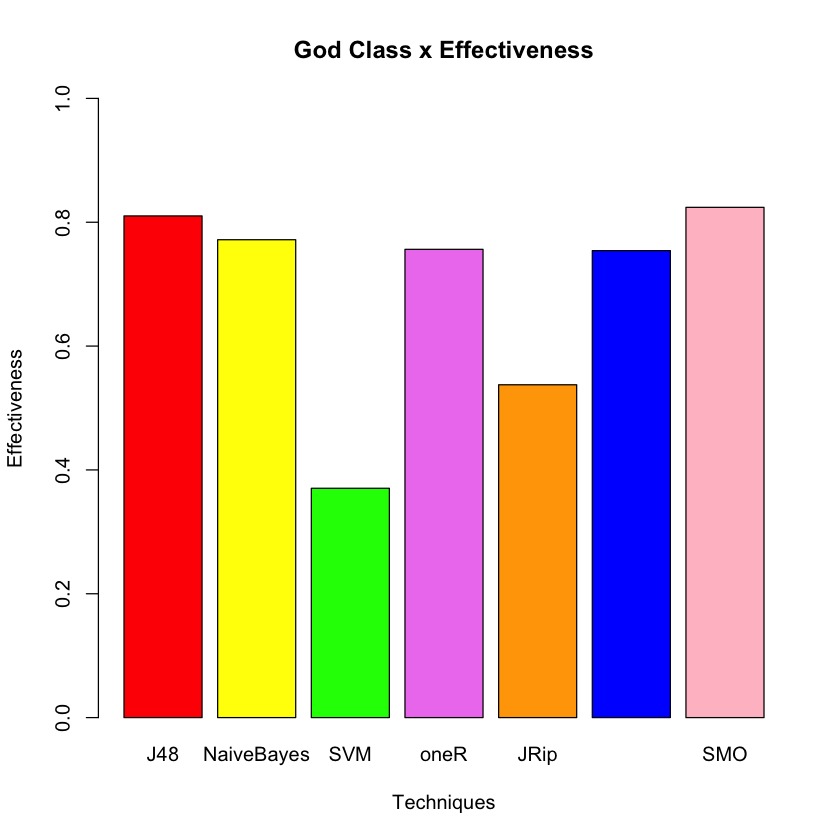

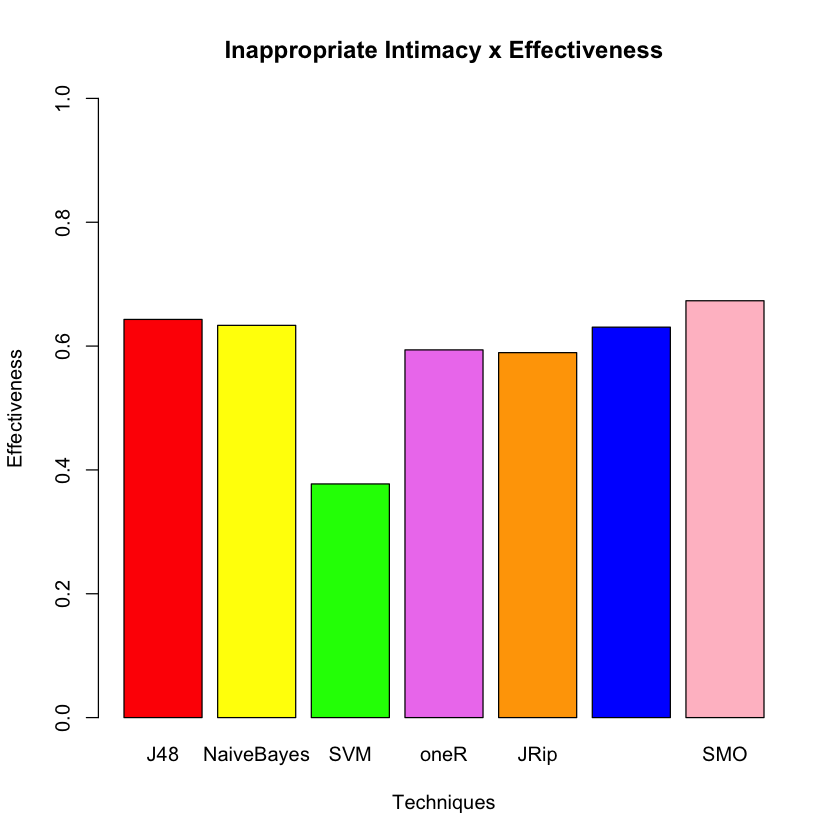

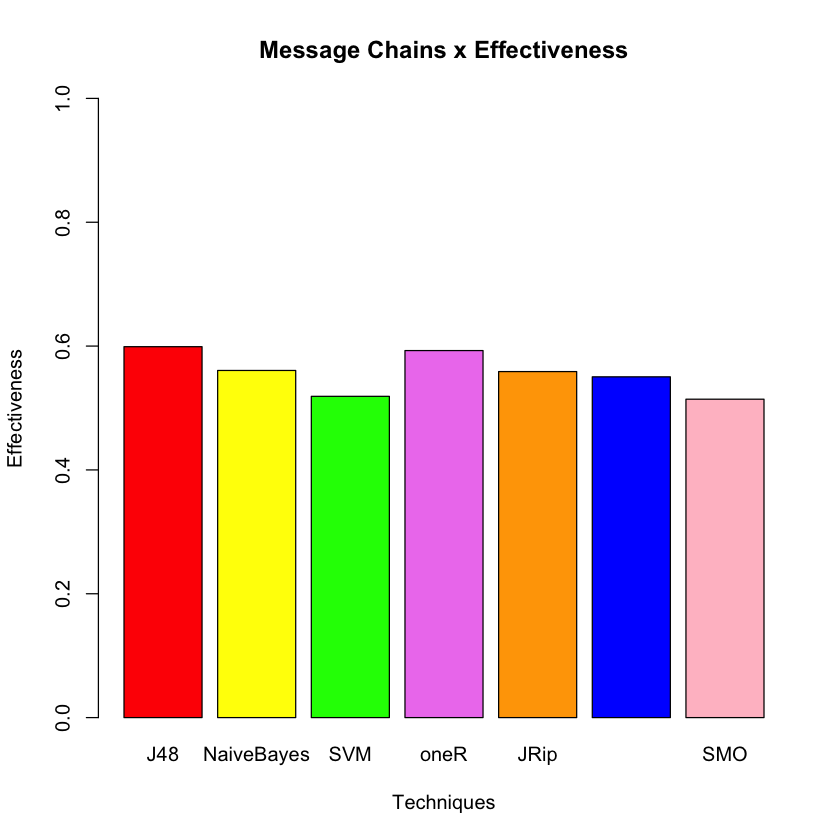

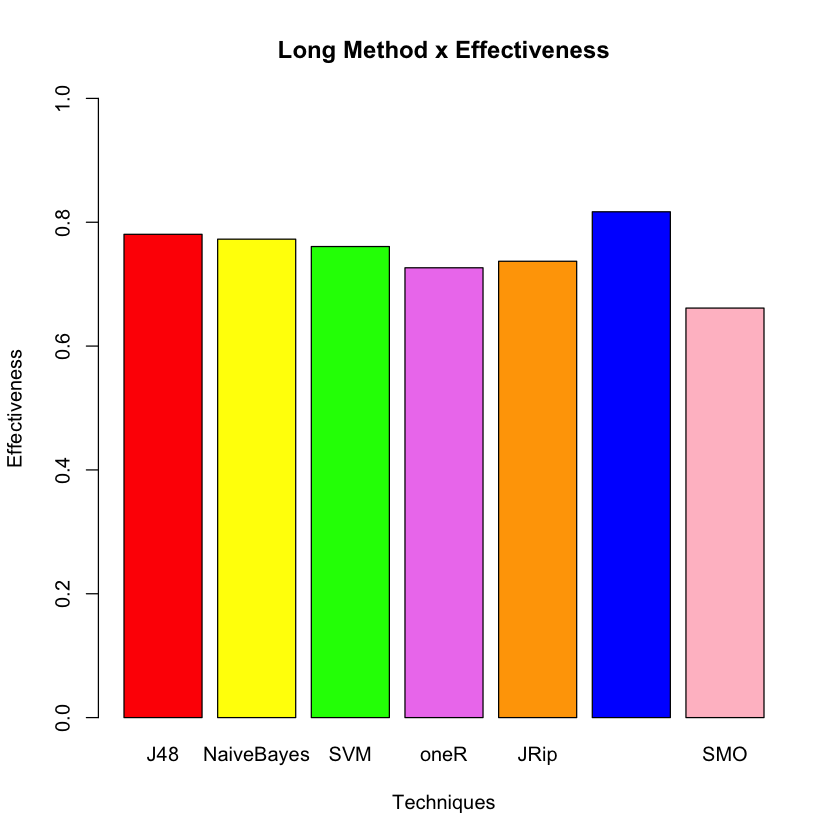

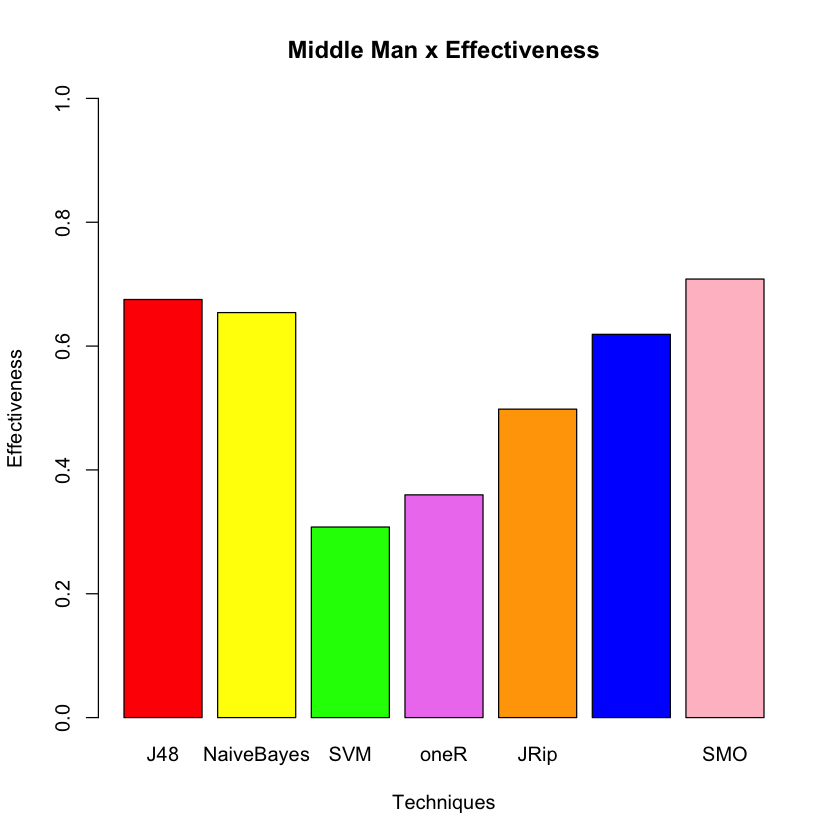

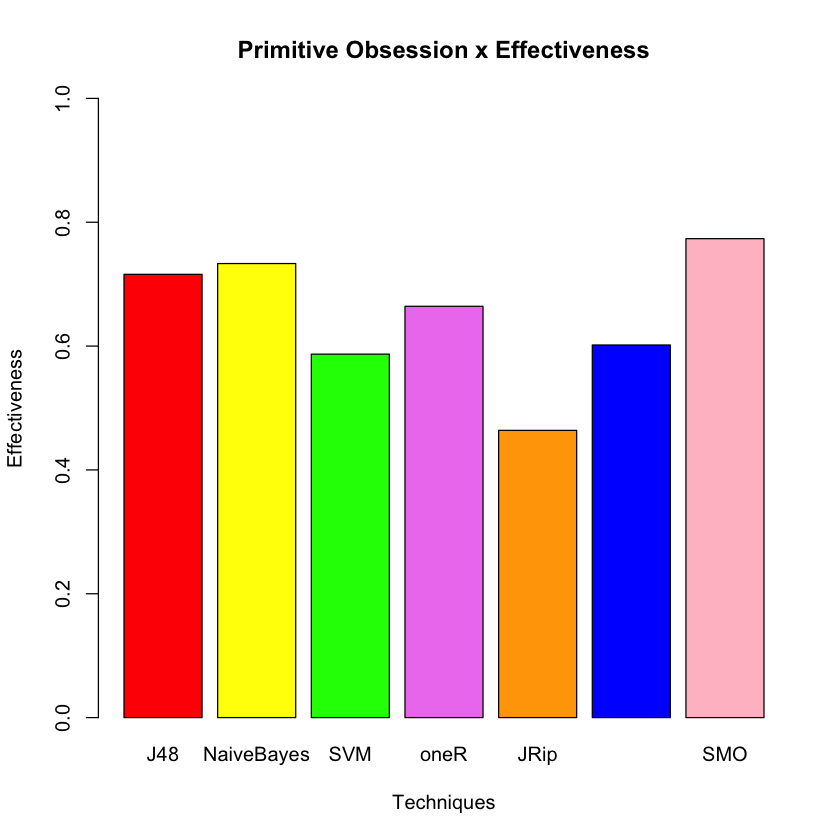

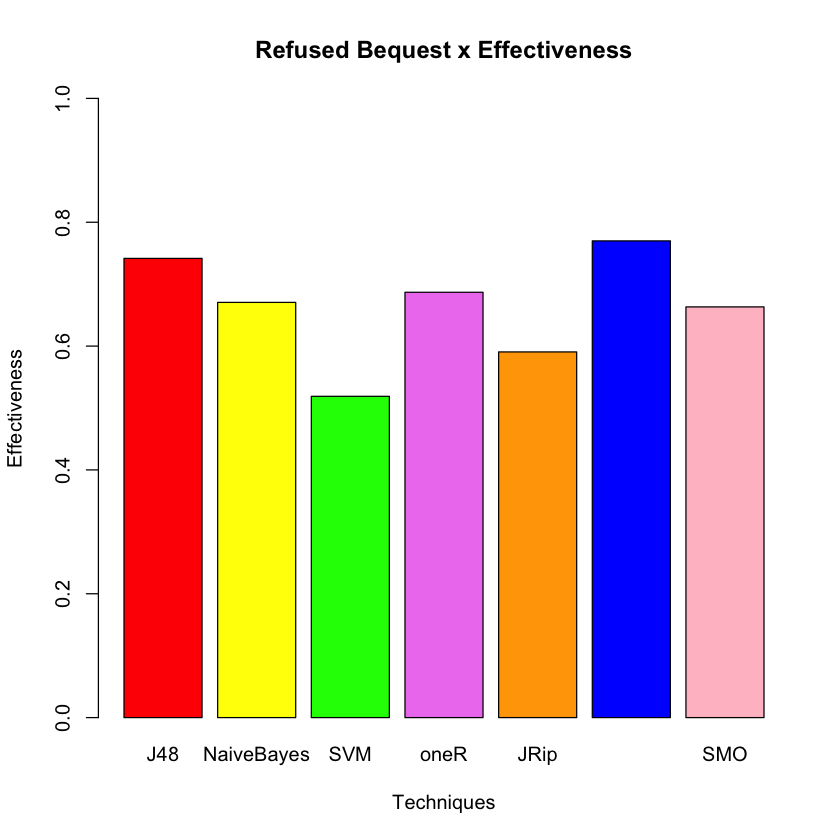

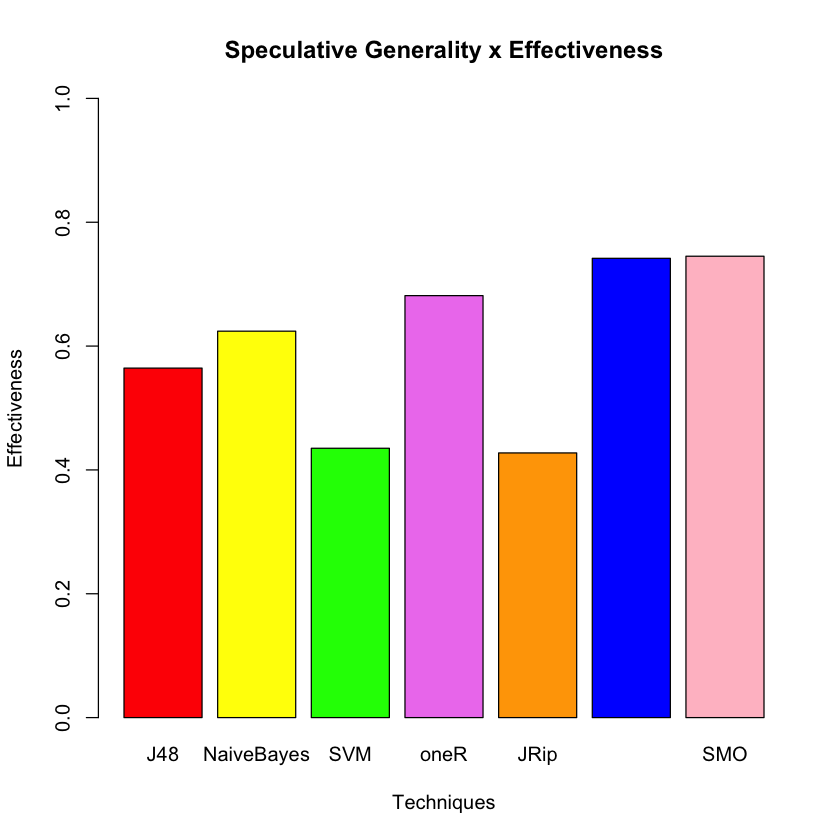

In [10]:
colnames(results_mean) <- techniques
rownames(results_mean) <- colnames(developers)
results_mean <- t(results_mean)
results_mean

barplot(results_mean, 
        main="Code Smells x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=c("red", "yellow", "green", "violet", "orange", "blue", "pink"), 
        ylim = c(0, 1),
        #legend = rownames(results_mean), 
        beside=TRUE)

result_FE <- results_mean[,1]
result_DCL <- results_mean[,2]
result_GC <- results_mean[,3]
result_II <- results_mean[,4]
result_LM <- results_mean[,5]
result_MC <- results_mean[,6]
result_MM <- results_mean[,7]
result_PO <- results_mean[,8]
result_RB <- results_mean[,9]
result_SG <- results_mean[,10]

colors <- c("red", "yellow", "green", "violet", "orange", "blue", "pink")

barplot(result_FE, 
        main="Feature Envy x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=colors, 
        ylim = c(0, 1),
        beside=TRUE)

barplot(result_DCL, 
        main="Data Class x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=colors, 
        ylim = c(0, 1),
        beside=TRUE)

barplot(result_GC, 
        main="God Class x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=colors, 
        ylim = c(0, 1),
        beside=TRUE)

barplot(result_II, 
        main="Inappropriate Intimacy x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=colors, 
        ylim = c(0, 1),
        beside=TRUE)

barplot(result_MC, 
        main="Message Chains x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=colors, 
        ylim = c(0, 1),
        beside=TRUE)

barplot(result_LM, 
        main="Long Method x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=colors, 
        ylim = c(0, 1),
        beside=TRUE)

barplot(result_MM, 
        main="Middle Man x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=colors, 
        ylim = c(0, 1),
        beside=TRUE)

barplot(result_PO, 
        main="Primitive Obsession x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=colors, 
        ylim = c(0, 1),
        beside=TRUE)

barplot(result_RB, 
        main="Refused Bequest x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=colors, 
        ylim = c(0, 1),
        beside=TRUE)

barplot(result_SG, 
        main="Speculative Generality x Effectiveness",
        ylab="Effectiveness",
        xlab="Techniques", 
        col=colors, 
        ylim = c(0, 1),
        beside=TRUE)

